In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Interactive 3D: 1 plot

In [14]:
# parameters
fault_id = 0; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
# load data
coor_fault = np.load('results/JD_Sula_2025_flow_coor&fault.npy')
pres = np.load('results/case1_PRES.npy')

# Filter data for the specific k layer
x_coor = coor_fault[:,:,:,0][coor_fault[:,:,:,3] == fault_id]
y_coor = coor_fault[:,:,:,1][coor_fault[:,:,:,3] == fault_id]
z_coor = coor_fault[:,:,:,2][coor_fault[:,:,:,3] == fault_id]
pres_val = pres[:,:,:,year_list.index(year)][coor_fault[:,:,:,3] == fault_id]/1000 # convert to MPa

# Create subplots
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]],
    # subplot_titles=('Temperature Distribution', 'Pressure Distribution')
)

# Pressure plot
pressure_scatter = go.Scatter3d(
    x=x_coor,
    y=y_coor,
    z=z_coor,
    mode='markers',
    marker=dict(
        size=2,
        color=pres_val,
        colorscale='viridis',
        colorbar=dict(
            title='Pressure (Bar)',
            x=1.1,  # Positioning the color bar
            # xanchor='right'
        ),
        showscale=True
    ),
    name='Pressure'
)

fig.add_trace(pressure_scatter, row=1, col=1)

# Update layout
fig.update_layout(
    title={
        'text': 'Fault id = 6',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='left',
        x=1.1
    ),
    scene=dict(
        xaxis_title='x (m)',
        yaxis_title='y (m)',
        zaxis=dict(
            title='z (m)',
            autorange='reversed' # reverse z-axis
        )
    ),
    margin=dict(l=0, r=10, b=10, t=50)
)

# Show plot
fig.show()

In [3]:
# Load the CSV file
file_path = 'results/case1_fault_table.csv'
data = pd.read_csv(file_path)

# Filter the data for fault_id=6
filtered_data = data[data['fault_id'] == 0]

# Extract necessary columns
xs_values = filtered_data['x_ave']
ys_values = filtered_data['y_ave']
zs_values = filtered_data['z_ave']
# temps_values = filtered_data['temps']
pressures_values = filtered_data['2030']
# pressures_values = filtered_data['fault_id']

# Create subplots
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]],
    # subplot_titles=('Temperature Distribution', 'Pressure Distribution')
)

# Pressure plot
pressure_scatter = go.Scatter3d(
    x=xs_values,
    y=ys_values,
    z=zs_values,
    mode='markers',
    marker=dict(
        size=2,
        color=pressures_values,
        colorscale='viridis',
        colorbar=dict(
            title='Pressure (Bar)',
            x=1.1,  # Positioning the color bar
            # xanchor='right'
        ),
        showscale=True
    ),
    name='Pressure'
)

fig.add_trace(pressure_scatter, row=1, col=1)

# Update layout
fig.update_layout(
    title={
        'text': 'Fault id = 6',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='left',
        x=1.1
    ),
    scene=dict(
        xaxis_title='x (m)',
        yaxis_title='y (m)',
        zaxis=dict(
            title='z (m)',
            autorange='reversed' # reverse z-axis
        )
    ),
    margin=dict(l=0, r=10, b=10, t=50)
)

# Show plot
fig.show()

# Static 3D plot

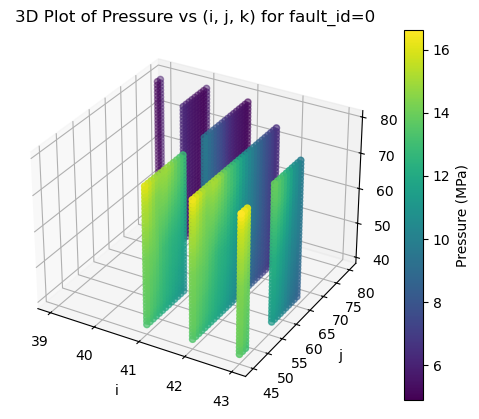

In [5]:
# Load the CSV file
file_path = 'results/case1_fault_table.csv'
data = pd.read_csv(file_path)

# Filter the data for fault_id=10
filtered_data = data[data['fault_id'] == 0]

# Extract necessary columns
is_values = filtered_data['i']
js_values = filtered_data['j']
ks_values = filtered_data['k']
temps_values = filtered_data['2030']/1000

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data
sc = ax.scatter(is_values, js_values, ks_values, c=temps_values, cmap='viridis')
plt.colorbar(sc, label='Pressure (MPa)')

# Set labels
ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_zlabel('k')
ax.set_title('3D Plot of Pressure vs (i, j, k) for fault_id=0')

# Show plot
plt.show()

# extract 1 fault

In [5]:
# Load the CSV file
file_path = 'data/fromMansur_fault_pressure_temp.csv'
data = pd.read_csv(file_path)

# Filter the data for fault_id=10
data_1fault = data[data['fault_id'] == 7]
# Rename columns using a dictionary
data_1fault.rename(columns={'fault_id': 'faultName', 'is': 'i','js': 'j','ks': 'k','xs': 'x','ys': 'y','zs': 'z',
                            'temps': 'temperature','pressures': 'pressure'}, inplace=True)
data_1fault['faultName'] = 'fault7'
data_1fault.to_csv('data/data_sim_fault7.csv',index=False)

C:\Users\dingj\AppData\Local\Temp\ipykernel_21596\2330286693.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dingj\AppData\Local\Temp\ipykernel_21596\2330286693.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

